<a href="https://colab.research.google.com/github/mgdjaxo/hans_huginn/blob/master/doc2vec/gensim_doc2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!mkdir data
!cp 'gdrive/My Drive/blog_notebooks/hotel-reviews.csv' 'data/hotel-reviews.csv'

In [3]:
!tail -5 data/hotel-reviews.csv

id49254,"The only positive impression is location and public parking on the opposite site of the street. The hotel and rooms are very-very-very modest and spartan (even we have an upgraded room with a shower and wc) and also not very clean. Hotel is ok for its price but next time in SFO I'll better pay more and choose better hotel.
Breakfast is not included, however there it very nice place with great breakfasts (porridge, toasts, fruits, eggs, etc.) from -am just two minutes away - Cafe de la Presse (https:--maps.google.ru-maps?hl=ru).",InternetExplorer,Mobile,not happy
id49255,"Traveling with friends for shopping and a show. The location is Great, but that is the best I can say. The rooms are very average, hallway carpet is stained and buckled in many places. Couch and carpet in the room were also both stained. We had - rooms each with - people. One room had one nice fluffy robe and a throw, the other room had none. Upon leaving we called -- minutes ahead ahead for our car, as instru

Imports package

In [0]:
import pandas , nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

Load Data

In [0]:
filename = 'data/hotel-reviews.csv'
df = pandas.read_csv(filename, sep=',')

In [6]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [7]:
def nltk_tokenizer(_wd):
  return RegexpTokenizer(r'\w+').tokenize(_wd.lower())

df['Token_Description'] = df['Description'].apply(nltk_tokenizer)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Token_Description
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,"[the, room, was, kind, of, clean, but, had, a,..."
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,"[i, stayed, at, the, crown, plaza, april, apri..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,"[i, booked, this, hotel, through, hotwire, at,..."
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"[stayed, here, with, husband, and, sons, on, t..."
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,"[my, girlfriends, and, i, stayed, here, to, ce..."


Check Data

In [8]:
tokens = [ t for d in df['Token_Description'] for t in d]
text = nltk.Text(tokens, name='hotel_review')
print(len(text.tokens))
print(len(set(text.tokens)))

6147511
46936


In [9]:
print(text.vocab().most_common(10))

[('the', 403077), ('and', 214287), ('a', 177061), ('to', 158094), ('was', 134667), ('i', 113235), ('in', 102555), ('we', 88080), ('of', 84151), ('is', 76153)]


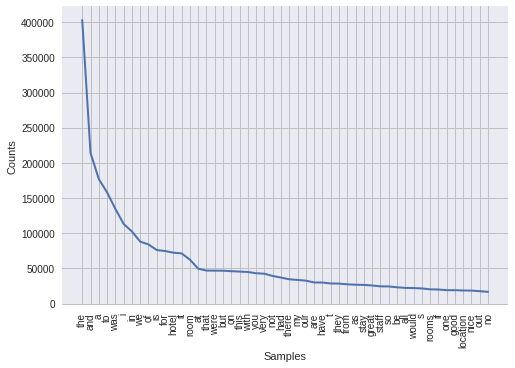

In [10]:
text.plot(50)

In [0]:
# tagged=nltk.pos_tag(tokens)
# allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]

In [12]:
lower_cnt = int(len(set(text.tokens)) * 0.01) * -1
print(text.vocab().most_common()[:lower_cnt:-1])

[('trocadero', 1), ('degustation', 1), ('grandiosity', 1), ('contiki', 1), ('sheri', 1), ('pranged', 1), ('moguls', 1), ('kattan', 1), ('wheelers', 1), ('kerouac', 1), ('upsells', 1), ('immobilized', 1), ('veeeery', 1), ('lunching', 1), ('boop', 1), ('offerrings', 1), ('caitlins', 1), ('cupon', 1), ('faneul', 1), ('ez', 1), ('courtous', 1), ('hilfiger', 1), ('lubricated', 1), ('mattering', 1), ('recede', 1), ('jaffe', 1), ('english\xe2', 1), ('contradictory', 1), ('huntingdon', 1), ('aquafina', 1), ('pbrs', 1), ('privatnkse', 1), ('opodo', 1), ('grapevine', 1), ('stucture', 1), ('furter', 1), ('hosptials', 1), ('thanksfully', 1), ('spiller', 1), ('glittery', 1), ('nywhere', 1), ('epiphany', 1), ('jetski', 1), ('slue', 1), ('proberly', 1), ('mite', 1), ('tempered', 1), ('lanais', 1), ('wesley', 1), ('locati', 1), ('locatn', 1), ('misters', 1), ('woulnt', 1), ('handerly', 1), ('conerns', 1), ('clouths', 1), ('leaded', 1), ('aawsome', 1), ('expendables', 1), ('gnats', 1), ('aritza', 1), (

In [0]:
doc_df = df[['User_ID','Token_Description']].values.tolist()

In [0]:
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

In [15]:
max_epochs = 10

model = Doc2Vec(
    window=10,
    size=150,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/usr/local/lib/python2.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [16]:
model.wv.most_similar('korea',topn=10)

/usr/local/lib/python2.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sunland', 0.36767110228538513),
 ('chi', 0.3660660684108734),
 ('china', 0.34577131271362305),
 ('litre', 0.3443159759044647),
 ('chestnut', 0.3403611183166504),
 ('northern', 0.3322069048881531),
 ('stout', 0.330847829580307),
 ('sansom', 0.32717645168304443),
 ('capital', 0.32664617896080017),
 ('starring', 0.32616478204727173)]

In [17]:
model.wv.most_similar("clean")

[('spotless', 0.6767203211784363),
 ('immaculate', 0.6565164923667908),
 ('cleaned', 0.40881335735321045),
 ('couteous', 0.3559042811393738),
 ('ok', 0.3527701795101166),
 ('cleanliness', 0.34923362731933594),
 ('dirty', 0.34790265560150146),
 ('spacious', 0.34194132685661316),
 ('smallish', 0.3345677852630615),
 ('refreshed', 0.33196794986724854)]

In [105]:
test_id = 20
df['User_ID'][test_id], df['Description'][test_id]

('id10346',
 'Having stayed at many Hilton properties, I expect a friendly efficient service from what is considered a good brand.\r\nThis property was a let down. Initially, things went smoothly. Check-in was fine, as a HHonors Gold member I was informed with an apology that they did not have an Executive Floor to upgrade me to, but put me in a - bedroom suite and offered me a complimentary buffet breakfast and the usual wifi vouchers. This is where the good things ended.\r\nThe room had issues. Initially, the phone in the living room did not work. They sent someone up to fix the phone, and then some --- hours later it just started randomly producing high pitched beeps (which in turn woke me up). In addition, the guest compendium was empty (as in someone had removed the pages). It took - phone calls and - people to come up to my room to actually understand what I was requesting, and deliver a full compendium.\r\nI also had cause to contact and visit the front desk at various stages la

In [106]:
model.random.seed(9999)

doc_list = df['Token_Description'][test_id]

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)

for rd in return_docs:
  for des in df[df['User_ID'] == rd[0]]['Description']:
    print rd[0],rd[1],des

id20700 0.856425523758 Very nice hotel, good location and the staff very friendly and helpful!
id41945 0.839778244495 Very helpful staff, great location
id28418 0.834971487522 A great place to stay, very nice staff and great location.
id19362 0.834781050682 Great service, great location. Very friendly and helpful staff.
id27358 0.830745518208 Great place to stay and super convenient to everything!


In [89]:
model.random.seed(9999)

doc_list = 'Rooms were clean'.split(' ')

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)
for rd in return_docs:
  for des in df[df['User_ID'] == rd[0]]['Description']:
    print rd[0],rd[1],des

id32805 0.861150860786 Staff was extremely polite and helpful. Rooms were clean.
id33500 0.849733650684 Great clean rooms very spacious, clean friendly staff!
id41945 0.843459010124 Very helpful staff, great location
id48142 0.842454016209 The hotel was clean and the staff was friendly. Location was good.
id33404 0.840933084488 Great clean, affordable place in a perfect location.


In [96]:
return_docs = model.docvecs.most_similar('id39751',topn=5)
for rd in return_docs:
  for des in df[df['User_ID'] == rd[0]]['Description']:
    print rd[0],rd[1],des

id37976 0.928553938866 great location, excellent rooms, great breakfast buffet, and good fitness center
id29960 0.92801874876 It's a great hotel; great rooms, great service, great location.
id36278 0.911462426186 The staff was wonderful and the rooms beautiful. Lovely accomodations
id22388 0.908386409283 The employees were very accommodating and friendly
id33841 0.906907320023 Very nice and clean rooms. Will definitely stay here again.
